# MNIST MLP (Multi-Layer-Perceptron ) Model

Multi-Layer-Perceptron Model trained on MNIST dataset. Machine learning model to categorise one of the UCI digit tasks. 
The model has one input layer, a hidden layer and an output layer. Built from scratch only using the libaray numpy.

## Section 1:
### Importing Libraries, loading the dataset and creating train and test dataset using numpy

#### Importing libraries

In [190]:
#library imports numpy, pandas, matplotlib and random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import seaborn as sns



In [191]:
#importing dataset using pandas
#df_train for training and df_test for testig purposes
df_train  = pd.read_csv('data/dataSet1.csv', header = None)
df_test  = pd.read_csv('data/dataSet2.csv', header = None)


#### Checking the pandas data

In [192]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [193]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,7,16,16,16,2,0,0,0,...,0,0,0,8,13,10,2,0,0,0
1,0,0,13,16,7,0,0,0,0,2,...,0,0,0,13,16,16,12,0,0,2
2,0,0,4,15,16,16,10,0,0,0,...,0,0,0,2,16,11,3,0,0,5
3,0,0,3,14,16,16,6,0,0,0,...,0,0,0,7,14,2,0,0,0,7
4,0,0,0,1,15,10,0,0,0,0,...,0,0,0,0,4,16,7,0,0,4


#### Creating Numpy Arrays

In [194]:
#creating numpy arrays train and test out of pd dataframe for easier data manipulation 
train = df_train.to_numpy()
test = df_test.to_numpy()


In [195]:
#checking array shape for verfication 
train.shape


(2810, 65)

#### Creating train and test data with inputs and labels

In [196]:
#creating train and test data

#X_train contains all input values wich are the pixel values here. 
#The first 64 coloumns of each row are the input values
X_train = train[:, :64] 

#Y_train contains all label/output values wich are the actual numbers
Y_train = train[:, 64] 

#similary this will be test data
X_test = test[:, :64]
Y_test = test[:, 64]

# Section 2:
### Defining Hyperparameter Variables and functions to initialize the weights along with functions to define activation functions for input and output layers

#### Hyperparameter Variables

In [197]:
#defining hyperparameter variables 

#h is the number of neurons in the hidden layer
#training_cycles is number of cycles
#learning_rate is to control the models learning rate

h = 180
training_cycles = 2000
learning_rate = 0.009



#### Initializing model weights 

Takes in argument 'h' and initalizes the weights for the model using HE Initialzation with variance 2/n_in for ReLU activation.
Bias values are initalized using the 'h' called b1 and b2.

In [198]:
def init_params(h):
    w1 = np.random.randn(h, 64) * np.sqrt(2. / (64))  # He initialization
    b1 = np.zeros((h, 1))  #bias value in input-hidden layer
    
    w2 = np.random.randn(10, h) * np.sqrt(2. / (h))  # He initialization
    b2 = np.zeros((10, 1))  #bias value for hidden-output layer
    return w1, b1, w2, b2


#### Defining Sigmoid and LeakyRelu activation functions

In [199]:
#defineing Sigmoid function
def sigmoid(Z):
    return 1/(1+np.exp(-Z))


In [200]:
def LeakyReLU(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)


# Section 3:
### Defining feed_forward , label encoding and backward propogation function for the model

#### Feed Forward Function 

Takes in arguments w1, b1, b2 and X. 
X will X_train or training input values

In [201]:
def feed_forward(w1, b1, w2, b2, X):
    Z1 = np.dot(w1, X.T) + b1
    A1 = LeakyReLU(Z1)
    
    Z2 = np.dot(w2, A1) + b2
    A2 = sigmoid(Z2)  
    
    return Z1, A1, Z2, A2

#### Map Labels function 

Maps label to an array of size 10
Output/Label values range from 0-9. 

Based on label value map 1 to an array
ex: if label is 4 then map the 4th element as 3

[0,0,0,1,0,0,0,0,0,0]


In [202]:
#mapping label to an array
#ex: if label is 5 then map the 4th element as 1

def map_labels(Y):
    l1 = len(Y) #get len of the array
    l2 = 10 #10 as the numbers range from 0-9
    mapped_label = np.zeros((l2, l1), dtype=int)
    for i, label in enumerate(Y):
        mapped_label[label][i] = 1
    return mapped_label


#### LekyRelu derivative  function 


In [203]:
def LeakyReLU_derivative(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)


#### Back Propogate  function 

Calculate gradients for weights and biases in the output and hidden layers using backpropagation.
Uses Leaky ReLU derivative for the hidden layer and mapped labels for the output layer.


In [ ]:
def back_prop(Z1, A1, Z2, A2, w2, X, Y):
    m = Y.size
    mapped_label = map_labels(Y)
    
    # Backpropagation for the output layer (Z2 -> A2)
    dZ2 = A2 - mapped_label  # Gradient for output layer
    dw2 = (1 / m) * np.dot(dZ2, A1.T)  # Gradient for w2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # Gradient for b2
    
    # Backpropagation for the hidden layer (Z1 -> A1)
    dZ1 = np.dot(w2.T, dZ2) * LeakyReLU_derivative(Z1)  # Leaky ReLU derivative
    dw1 = (1 / m) * np.dot(dZ1, X)  # Gradient for w1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # Gradient for b1
    
    #returns computed gradients of the weights 
    return dw1, db1, dw2, db2


#### Update Params Fucntion

In [205]:
#function to update the params as we train
#alpha is the learning rate

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2



# Section 4:
### Defining prediction and accuracy functions
### Training the MLP Network

#### Prediction and Accuracy Functions

In [206]:
def get_predictions(A2):
    print("Predictions (using np.argmax):", np.argmax(A2, axis=0))  # Debugging
    return np.argmax(A2, axis=0)


In [207]:
def get_accuracy(predictions, Y):
    mapped_label = map_labels(Y)
    accuracy = np.sum(predictions == np.argmax(mapped_label, axis=0)) / Y.size *100
    return accuracy


#### Training the Network with RMS Prop

Training function is definied below with RMS Prop optimizer

Train the neural network using RMSprop optimization and dynamic learning rate adjustment. 
Includes weight decay for L2 regularization and early stopping based on accuracy improvement.
Periodically evaluates test accuracy and saves the best model parameters.


In [ ]:

def mlp_model(X_train, Y_train, X_test, Y_test, iterations, learning_rate):
    # Initialize parameters
    w1, b1, w2, b2 = init_params(h)  # h is the hidden layer size
    
    # RMSprop parameters
    epsilon = 1e-8
    weight_decay = 1e-4  # L2 regularization
    
    # RMSprop specific variables
    cache_w1, cache_b1, cache_w2, cache_b2 = np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2)
    
    best_accuracy = 0
    patience = 10
    no_improve_counter = 0
    
    best_w1, best_b1, best_w2, best_b2 = w1.copy(), b1.copy(), w2.copy(), b2.copy()  
    
    for iteration in range(iterations):
        # Dynamic learning rate adjustment
        lr = learning_rate * (0.99 ** (iteration // 500))
        
        # Forward and backward pass
        Z1, A1, Z2, A2 = feed_forward(w1, b1, w2, b2, X_train)
        dw1, db1, dw2, db2 = back_prop(Z1, A1, Z2, A2, w2, X_train, Y_train)
        
        # Add weight decay (L2 regularization)
        dw1 += weight_decay * w1
        dw2 += weight_decay * w2
        
        # RMSprop optimization with squared gradients
        cache_w1 = 0.9 * cache_w1 + 0.1 * (dw1 ** 2)
        cache_b1 = 0.9 * cache_b1 + 0.1 * (db1 ** 2)
        cache_w2 = 0.9 * cache_w2 + 0.1 * (dw2 ** 2)
        cache_b2 = 0.9 * cache_b2 + 0.1 * (db2 ** 2)
        
        # Parameter updates with RMSprop
        w1 -= lr * dw1 / (np.sqrt(cache_w1) + epsilon)
        b1 -= lr * db1 / (np.sqrt(cache_b1) + epsilon)
        w2 -= lr * dw2 / (np.sqrt(cache_w2) + epsilon)
        b2 -= lr * db2 / (np.sqrt(cache_b2) + epsilon)
                # Print training accuracy every 10 iterations

        if iteration % 10 == 0:
            Z1_train, A1_train, Z2_train, A2_train = feed_forward(w1, b1, w2, b2, X_train)
            train_predictions = get_predictions(A2_train)
            train_accuracy = get_accuracy(train_predictions, Y_train)
            print(f"Iteration {iteration}: Train Accuracy {train_accuracy:.2f}%")
            
            
        # Periodic evaluation every 100 iterations
        if iteration % 100 == 0:
            # Evaluate on training data
            Z1_train, A1_train, Z2_train, A2_train = feed_forward(w1, b1, w2, b2, X_train)
            train_predictions = get_predictions(A2_train)
            train_accuracy = get_accuracy(train_predictions, Y_train)
            
            Z1_test, A1_test, Z2_test, A2_test = feed_forward(w1, b1, w2, b2, X_test)
            test_predictions = get_predictions(A2_test)
            test_accuracy = get_accuracy(test_predictions, Y_test)
            
            print(f"Iteration {iteration}: Train Accuracy {train_accuracy:.2f}% | Test Accuracy {test_accuracy:.2f}% | Learning rate: {lr:.6f} | Weight Decay: {weight_decay:.6f}")
            
            # Update best accuracy and monitor no improvement
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_w1, best_b1, best_w2, best_b2 = w1.copy(), b1.copy(), w2.copy(), b2.copy()  # Save the best model
                no_improve_counter = 0
            else:
                no_improve_counter += 1
            
            # If we reach taget accuracy, stop
            if test_accuracy >= 98.04:
                print(f"Achieved target accuracy of 98% at iteration {iteration}.")
                break
            
            # If no improvement after 'patience' iterations, adjust hyperparameters
            if no_improve_counter > patience:
                print(f"No improvement for {patience} iterations. Adjusting hyperparameters...")
                weight_decay *= 0.5  # weight decay 
                learning_rate *= 0.9  # learning rate updates
                no_improve_counter = 0  # Reset the counter
    
    # Once training is over, return the best model
    return best_w1, best_b1, best_w2, best_b2



#### Training the model and calling the fucntion

In [ ]:
# Execute with RMSprop optimization and train the model
best_w1, best_b1, best_w2, best_b2 = mlp_model(X_train, Y_train, X_test, Y_test, iterations=training_cycles, learning_rate = learning_rate)

Predictions (using np.argmax): [2 2 8 ... 2 2 8]
Iteration 0: Train Accuracy 9.93%
Predictions (using np.argmax): [2 2 8 ... 2 2 8]
Predictions (using np.argmax): [2 8 2 ... 2 2 2]
Iteration 0: Train Accuracy 9.93% | Test Accuracy 9.75% | Learning rate: 0.009000 | Weight Decay: 0.000100
Predictions (using np.argmax): [0 0 7 ... 4 1 7]
Iteration 10: Train Accuracy 74.77%
Predictions (using np.argmax): [0 0 7 ... 8 1 7]
Iteration 20: Train Accuracy 91.46%
Predictions (using np.argmax): [0 0 7 ... 8 1 7]
Iteration 30: Train Accuracy 94.20%
Predictions (using np.argmax): [0 0 7 ... 8 1 7]
Iteration 40: Train Accuracy 97.62%
Predictions (using np.argmax): [0 0 7 ... 2 1 7]
Iteration 50: Train Accuracy 92.31%
Predictions (using np.argmax): [0 0 7 ... 8 1 7]
Iteration 60: Train Accuracy 98.47%
Predictions (using np.argmax): [0 0 7 ... 8 1 7]
Iteration 70: Train Accuracy 97.37%
Predictions (using np.argmax): [0 0 7 ... 8 1 7]
Iteration 80: Train Accuracy 98.97%
Predictions (using np.argmax): [

# Section 5: Evaluation
### Finally evaluating the Model and getting is accuracy on test data

#### Function to Evaluate the model and calling accuracy fucntion to get performance results on test data

In [210]:
def model_eval(X, Y, w1, b1, w2, b2):
    Z1, A1, Z2, A2 = feed_forward(w1, b1, w2, b2, X) 
    predictions = get_predictions(A2)                
    accuracy = get_accuracy(predictions, Y)          
    print(f"Accuracy on Test Data: {accuracy:.2f}%")  
    return accuracy


#### Final Accuracy score on Test Data

In [ ]:
#call the modal eval function and print the final accuracy 
accuracy = model_eval(X_test, Y_test,best_w1, best_b1, best_w2, best_b2)

Predictions (using np.argmax): [0 2 5 ... 8 9 8]
Accuracy on Test Data: 98.08%


In [212]:
#function to perform predictions, this will be used for the plots below 
def perform_predictions(w1, b1, w2, b2, X_test):
    Z1, A1, Z2, A2 = feed_forward(w1, b1, w2, b2, X_test)
    predictions = get_predictions(A2)  
    return predictions


#### Fucntion to select 4 random samples from test data, get actual vs predicted values and plot them

In [213]:
#function to plot predictions for visualization purposes
def plot_predictions(X_test, Y_test, w1, b1, w2, b2, num_samples=4):
    random_indices = random.sample(range(X_test.shape[0]), num_samples)
    selected_X = X_test[random_indices, :]
    selected_Y = Y_test[random_indices]

    Z1, A1, Z2, A2 = feed_forward(w1, b1, w2, b2, selected_X)
    predictions = get_predictions(A2)

    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(selected_X[i].reshape(8, 8), cmap='gray')
        plt.title(f"Actual: {selected_Y[i]}\nPredicted: {predictions[i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Predictions (using np.argmax): [7 3 1 5]


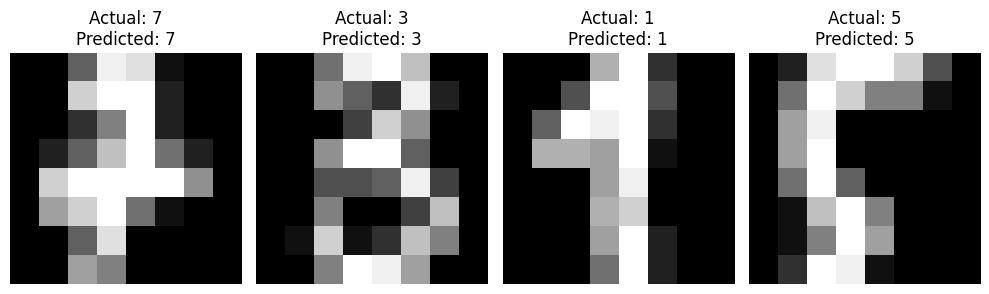

In [214]:
#plot predictions function being called
plot_predictions(X_test, Y_test, best_w1, best_b1, best_w2, best_b2)


In [215]:

def plot_confusion_matrix(X_test, Y_test, w1, b1, w2, b2):
    
    predictions = perform_predictions(best_w1, best_b1, best_w2, best_b2,X_test)

    # Number of classes 
    num_classes = len(np.unique(Y_test))
    
    # Create the confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(Y_test, predictions):
        confusion_matrix[true_label, pred_label] += 1
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Predictions (using np.argmax): [0 2 5 ... 8 9 8]


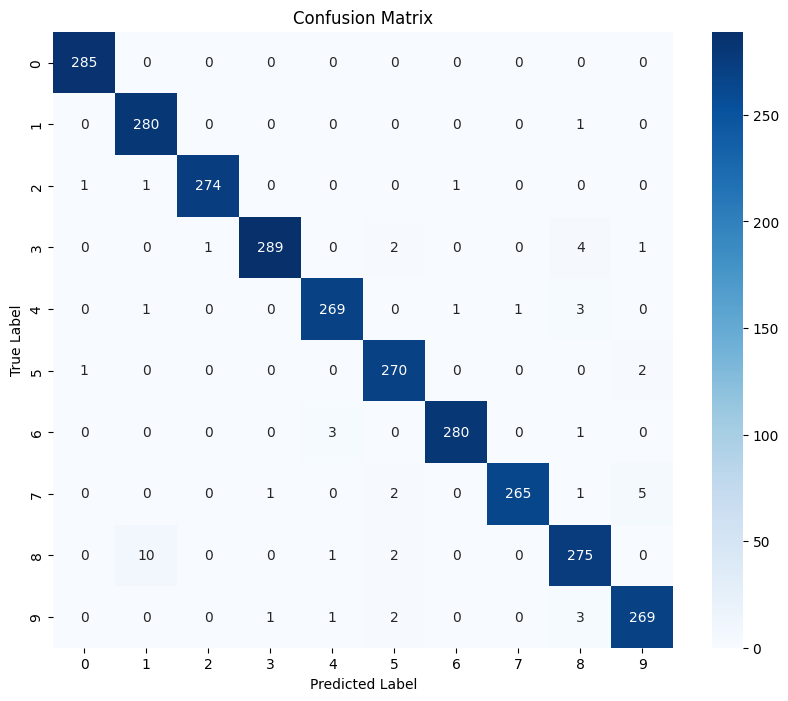

In [216]:
plot_confusion_matrix(X_test, Y_test, best_w1, best_b1, best_w2, best_b2)
